### DATA CLEANING AND ANALYSIS

- Project Background Information.

- Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of such a census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding. In the project, you will be provided with a mock census of an imaginary modest town. I would like you to consider yourselves to be part of a local government team who will be making decisions on what to do with anunoccupied plot of land and what to invest in. To address these questions, you will need to clean and analyse the mock census data provided

### Import the basic python libraries and loading the csv file


In [1]:
# Import the basic python libraries
import csv
import numpy as np # for numerical computing
import pandas as pd # for loading the data set and carrying out vital analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

In [2]:
# Loading the csv file
census10_df = pd.read_csv('census10.csv')

### Running checks on the CSV file

In [3]:
# checking the first 5 rows
census10_df.head()


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Upland Creek,Ross,Barton,26.0,Head,Married,Male,"Solicitor, Scotland",None,Christian
1,1,Upland Creek,Amelia,Barton,26.0,Wife,Married,Female,Lawyer,None,None
2,2,Upland Creek,Francesca,Smith,50.0,Head,Married,Female,Unemployed,None,None
3,2,Upland Creek,Connor,Smith,53.0,Husband,Married,Male,Unemployed,,None
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,NaN,Male,Student,None,NaN


In [4]:
# checking the last 5 rows
census10_df.tail()


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,NaN,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,NaN,Male,Student,None,NaN
7908,1,Murphy Fortress,Rhys,Collier,3.0,Son,NaN,Male,Child,None,NaN
7909,1,Murphy Fortress,Jeffrey,Short,58.0,Visitor,Divorced,Male,"Engineer, automotive",None,None
7910,1,Murphy Fortress,Carl,Johnson,52.0,Lodger,Divorced,Male,Medical sales representative,None,Christian


In [5]:
census10_df.shape # to confirm the number of rows and column

(7911, 11)

##### Checks for missing rows and duplicates

In [6]:
census10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   7911 non-null   int64  
 1   Street                         7911 non-null   object 
 2   First Name                     7911 non-null   object 
 3   Surname                        7911 non-null   object 
 4   Age                            7911 non-null   float64
 5   Relationship to Head of House  7911 non-null   object 
 6   Marital Status                 5944 non-null   object 
 7   Gender                         7911 non-null   object 
 8   Occupation                     7911 non-null   object 
 9   Infirmity                      7911 non-null   object 
 10  Religion                       5895 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 680.0+ KB


- 2 columns (Religion and Marital Status) have missing rows
- 9 columns have object data type, 1 column (Age) has float data type and 1 column(House Number) has integer data type
- There are total of 7911 rows and 11 columns

In [7]:
census10_df['Religion'].isnull().sum() # to confirm the number of missing rows

2016

In [8]:
census10_df['Marital Status'].isnull().sum() # to confirm the number of missing rows

1967

In [9]:
# checking for row with missing data
census10_df.isnull()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
7906,False,False,False,False,False,False,True,False,False,False,True
7907,False,False,False,False,False,False,True,False,False,False,True
7908,False,False,False,False,False,False,True,False,False,False,True
7909,False,False,False,False,False,False,False,False,False,False,False


- The column for Religion has 2016 missing rows while the column for Marital Status has 1967 missing rows

In [10]:
census10_df.duplicated().sum() # to check for duplicates

1

- The file has 1 duplicate row

##### Checking through each column for empty strings and uniqueness

In [11]:
# Checking for empty strings within rows in  the given columns
empty_strings_columns = census10_df.applymap(lambda x: isinstance(x, str) and x.strip() == '').any()

# print the columns with empty strings
columns_with_empty_strings = empty_strings_columns[empty_strings_columns].index.tolist()
print("Columns with empty row:", columns_with_empty_strings)

#  number of rows with empty strings for each given column
for column in columns_with_empty_strings:
    number_of_empty_rows = census10_df[census10_df[column].str.strip() == ''].shape[0]
    print(f"Number of empty rows in '{column}': {number_of_empty_rows}")


Columns with empty row: ['First Name', 'Surname', 'Gender', 'Occupation', 'Infirmity']
Number of empty rows in 'First Name': 2
Number of empty rows in 'Surname': 1
Number of empty rows in 'Gender': 1
Number of empty rows in 'Occupation': 2
Number of empty rows in 'Infirmity': 11


In [12]:
census10_df['Religion'].unique()

array(['Christian', 'None', nan, 'Muslim', 'Catholic', 'Methodist',
       'Jewish', 'Private', 'Sikh', 'Agnostic', 'Sith', 'Orthodoxy',
       'Hindu', 'Bahai', 'Baptist'], dtype=object)

- nan and Sith shall be replaced accordingly

In [13]:
census10_df['Marital Status'].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

- nan shall be replaced accordingly

In [14]:
census10_df['Infirmity'].unique()

array(['None', ' ', 'Mental Disability', 'Deaf', 'Blind',
       'Unknown Infection', 'Physical Disability', 'Disabled'],
      dtype=object)

In [15]:
census10_df['Infirmity'].mode().iloc[0]

'None'

- The empty string ' ' shall be replaced with 'None'being the most occured under the column for Infirmity

In [16]:
census10_df['Occupation'].unique()

array(['Solicitor, Scotland', 'Lawyer', 'Unemployed', ...,
       'Retired Theatre manager', 'Retired Web designer',
       'Retired Engineer, production'], dtype=object)

- The empty strings shall be filled with 'University Student'for the 19 year old and 'Unemployed for the 52 year old man
- University Student is the most occured for 19 years old while Unemployed appears to be dominant the most dominant Occupation for Age 52 years


In [17]:
census10_df['Gender'].unique()

array(['Male', 'Female', ' '], dtype=object)

- This empty string shall be replaced with 'Female'.The person being a 'daughter' to the Head of House. The appropriate Gender for a 'Daughter' should be 'Female'

In [18]:
census10_df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Husband', 'Adopted Son', 'None', 'Son',
       'Daughter', 'Lodger', 'Partner', 'Nephew', 'Visitor', 'Cousin',
       'Adopted Daughter', 'Grandson', 'Sibling', 'Granddaughter',
       'Neice', 'Step-Daughter', 'Daughter-in-law', 'Step-Son'],
      dtype=object)

In [19]:
census10_df['Age'].unique()

array([ 26.        ,  50.        ,  53.        ,  15.        ,
        20.        ,  55.        ,  30.        ,  24.        ,
        49.        ,  16.        ,  13.        ,  12.        ,
        54.        ,  18.        ,   9.        ,   8.        ,
         3.        ,  42.        ,  41.        ,  17.        ,
        44.        ,  31.        ,  21.        ,  59.        ,
        19.        ,  14.        ,  11.        ,  23.        ,
        29.        ,  32.        ,  36.        ,  28.        ,
         4.        ,  25.        ,  72.        ,  10.        ,
        33.        ,   7.        ,   1.        ,  39.        ,
        35.        ,  40.        ,   5.        ,  51.        ,
        45.        ,   6.        ,  62.        ,  66.        ,
        68.        ,  69.        ,  58.        ,  56.        ,
        60.        ,  37.        ,  75.        ,  46.        ,
        34.        ,   2.        ,   0.        ,  43.        ,
        47.        ,  63.        ,  27.        ,  22.  

- All the rows in float data type shall be converted to integer to maintain a consistent data type

In [20]:
census10_df['Surname'].unique()

array(['Barton', 'Smith', 'Walker', 'Wright', 'Stevenson', 'Forster',
       'Kelly', 'Clarke-Kelly', 'Turner', 'Roberts', 'Stokes', 'Archer',
       'Shaw', 'Austin', 'Wilson', 'French', 'Hughes', 'Jones',
       'Griffiths', 'McDonald', 'Hall', 'Ryan', 'Bradley-Ryan', 'Nash',
       'Sykes', 'Wood', 'Hudson', 'Harrison', 'Browne', 'Lees', 'Woods',
       'Fowler', 'Cooper', 'Mistry', 'Bevan', 'Collier', 'Holmes',
       'Price', 'White', 'Cook', 'Miles', 'Stevens', 'Davies', 'Rees',
       'Wilkins', 'Green', 'Dickinson', 'Williams', 'Pearson',
       'Green-Pearson', 'Sims', 'Storey', 'Scott', 'Reed', 'Webb',
       'Gordon', 'Lloyd', 'Lambert', 'Gill', 'Rogers', 'Greenwood',
       'Taylor', 'James', 'Lyons', 'Warren', 'Martin', 'Quinn', 'Parsons',
       'Skinner', 'Thomas-Hughes', 'Peters', 'May', 'Carter', 'Payne',
       'Boyle', 'Graham', 'Harrison-Graham', 'Hancock', 'Hill', 'Young',
       'Wade', 'Spencer', 'Brown', 'Briggs', 'Kaur', 'Phillips', 'Dodd',
       'Myers', 'Mor

- The empty strings shall be repalced with 'Roberts' which  is the surname of the  Head of house and he being a son to the Head

In [21]:
census10_df['First Name'].unique()

array(['Ross', 'Amelia', 'Francesca', 'Connor', 'Jacob', 'Paige',
       'Barbara', 'Declan', 'Melanie', 'Luke', 'Ben', 'Dorothy', 'Lisa',
       'Darren', 'Tracey', 'Charles', 'Samuel', 'Charlotte', 'Keith',
       'Clive', 'Molly', 'Heather', 'Joshua', 'Abbie', 'Dean', 'Kenneth',
       'Adrian', 'Joan', 'Sheila', 'Chelsea', 'Stacey', 'Rosemary',
       'Lesley', 'Aaron', 'Louise', 'Grace', 'Gerard', 'Claire', 'Bruce',
       'Stanley', 'Rebecca', 'Howard', 'Maurice', 'Shirley', 'Toby',
       'Ian', 'Josephine', 'Glen', 'Megan', 'Kim', 'Kimberley', 'Iain',
       'Jade', 'Chloe', 'Edward', 'Mohamed', 'Wayne', 'Danielle',
       'Charlie', 'Raymond', 'Conor', 'Katherine', 'Lynne', 'Sylvia',
       'Glenn', 'Yvonne', 'Arthur', 'Hugh', 'Jessica', 'Danny', 'Pamela',
       'Olivia', 'Alan', 'Richard', 'Maria', 'Lynn', 'Leigh', 'Simon',
       'John', 'Marc', 'Brian', 'Philip', 'Jenna', 'Teresa', 'Brenda',
       'Katy', 'Jordan', 'Marilyn', 'Suzanne', 'Laura', 'Marie', 'Judith',
       

- The empty strings shall be repalced with with 'Unknown'as no effective link to the first name is traced

In [22]:
census10_df['Street'].unique()

array(['Upland Creek', 'Holyroodbranch Avenue', 'Edwards Station',
       'Orchard Underpass', 'Roberts Shores', 'William Avenue',
       'Manorrigg Lane', 'Burton Lane', 'Leviathan Avenue',
       'Butcher Street', 'Virgocrack Road', 'Sandy Drive',
       'Eaglebelt Road', 'Conifer Lane', 'Temple Orchard',
       'Preston Valleys', 'Shark Parkways', 'Iqbal Drive',
       'Howell Avenue', 'Rogers Mount', 'Henge Drive', 'Bangor Burgs',
       'Wright River', 'Campbell Terrace', 'Davis Hollow',
       'Brighton Neck', 'Williams Stream', 'Appletree Avenue',
       'Salford Lane', 'March Motorway', 'Jones Track', 'Walker Walk',
       'Southampton Manor', 'Faulkner Road', 'Jones Stream', 'Fox Square',
       'Wessex Crest', 'Kent Hill', 'Threpenny Drives', 'Dundee Haven',
       'Sheffield Mills', 'Blackburn Inlet', 'Steele Islands',
       'Newport Street', 'Wright Ridges', 'Albion Street',
       'Bennett Street', 'Honeysuckle Avenue', 'Bletchley Road',
       'James Land', 'England Lane

In [23]:
census10_df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

### DATA CLEANING

###### This will be on column basis

###### Handling the column for Religion

In [24]:
# Replacing 'NA' with 'Unknown' in the 'Religion' column
census10_df['Religion'] = census10_df['Religion'].fillna('Unknown') # UK laws does not allow imposition of Religion on any one.
# Though majority are minor and we may have opted filling the Religion of the Parents: we rather stayed with 'Unknown' thereby assigning,
# thereby assigning no Religion and still maintaing the consistency of data on the Religion column

# Replacing 'Sith' with 'None' in the 'Religion' column
census10_df['Religion'] = census10_df['Religion'].replace('Sith', 'None') # No Religion as 'Sith' hence had to replace with 'None'

###### Handling the column for Infirmity

In [25]:
# Empty strings' ' replaced in the 'Infirmity' column by 'None' which is the mode 
census10_df.loc[census10_df['Infirmity'].str.strip() == '', 'Infirmity'] = 'None'

###### Handling the column for Occupation

In [26]:


# Replacing the empty strings under the Occupation column to 'Unknown' for one Age 52
census10_df.loc[(census10_df['Age'] == 52) & (census10_df['Occupation'].str.strip() == ''), 'Occupation'] = 'Unknown'


# Replacing the empty strings under the Occupation column to 'University Student' for Age 19
census10_df.loc[(census10_df['Age'] == 19) & (census10_df['Occupation'].str.strip() == ''), 'Occupation'] = 'University Student'


# Replacing 'Unemployed' with 'Retired Unemployed' for individual Age 68 and above; under the column 'Occupation'
census10_df.loc[census10_df['Age'] >= 68, 'Occupation'] = census10_df.loc[census10_df['Age'] >= 68, 'Occupation'].replace('Unemployed', 'Retired Unemployed')

# Though as at 2021 the State pension age is 66 years (both men and women) the average retirement age is around 65 years
# However from the data, its observed that the retirement the retirement age is 68 years. Handling of the occupation column
# was done in line with the nature and language of the data presented. Factually, today, the UK no longer has forced retirement age.

###### Handling the column for Marital Status

In [27]:
# Replacing 'NA' with 'Single minor' for individual Age  18 under Marital Status
census10_df.loc[(census10_df['Marital Status'].isna()) & (census10_df['Age'] < 18), 'Marital Status'] = 'Single minor'

# Replacing 'Single' with 'Single minor' for individual Age under 18 under Marital Status
census10_df.loc[(census10_df['Age'] < 18) & (census10_df['Marital Status'] == 'Single'), 'Marital Status'] = 'Single minor'

# Replacing 'Divorced' with 'Single minor' for individual Age 15 under Marital Status:Not practicable in Uk laws to be married at 15
census10_df.loc[(census10_df['Age'] == 15) & (census10_df['Marital Status'] == 'Divorced'), 'Marital Status'] = 'Single minor'


###### Handling the column for Surname

In [28]:
# Replace the empty string with 'Roberts' which is the Surname of Head of House 
census10_df.loc[census10_df['Surname'].str.strip() == '', 'Surname'] = 'Roberts'
#Roberts is the name of the Surname of the Head of the House who is a Female. This person is Related to the Head of House as son

###### Handling the column for First Name

In [29]:
# Replace the empty string with 'Unknown' since its almost impossible to link up to the first Name 
census10_df.loc[census10_df['First Name'].str.strip() == '', 'First Name'] = 'Unknown'



###### Handling the column for Age (coversion of all floats to integers)

In [30]:
# Conversion of all float to integers
census10_df['Age'] = census10_df['Age'].astype(int, errors='ignore')


###### Handling the column for Gender

In [31]:

# This empty string shall be replaced with 'Female'.The person being a 'daughter' to the Head of House. 
# The appropriate Gender for a 'Daughter' should be 'Female'

census10_df.loc[(census10_df['Relationship to Head of House'] == 'Daughter') & (census10_df['Gender'].str.strip() == ''), 'Gender'] = 'Female'


###### Handling the column for the Relationship to Head of House

In [32]:
# It is observed that the Head of House is a married 16 years male while the wife is 19 years with a son fo 2 year.
# Since the Head of House must not be less than 18, an operation was initiated on the data to move the Head of House to the wife
census10_df.loc[(census10_df['Age'] == 16) & (census10_df['Relationship to Head of House'] == 'Head'), 'Relationship to Head of House'] = 'Husband'
census10_df.loc[(census10_df['Age'] == 16) & (census10_df['Relationship to Head of House'] == 'Wife'), 'Relationship to Head of House'] = 'Head'

# Replacing underaged (15 years and 16 years) who are Head of House to 'Lodger' A Head of house cannot be less than 18 years
census10_df.loc[(census10_df['Age'] == 16) & (census10_df['Relationship to Head of House'] == 'Head'), 'Relationship to Head of House'] = 'Lodger'
census10_df.loc[(census10_df['Age'] == 15) & (census10_df['Relationship to Head of House'] == 'Head'), 'Relationship to Head of House'] = 'Lodger'

###### Handling for Duplicates

In [33]:
# Remove duplicates
census10_df.drop_duplicates(inplace=True) # duplicated row taken off
# save the cleaned csv file
census10_df.to_csv('census10_cleaned_data2.csv', index=False)


### CHECKING THROUGH TO CONFIRM DATA IS CLEANED

In [34]:
cleaned2_census10_df = pd.read_csv('census10_cleaned_data2.csv')

In [35]:
cleaned2_census10_df.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [36]:
cleaned2_census10_df['Religion'].isnull().sum() 

0

In [37]:
cleaned2_census10_df['Marital Status'].isnull().sum() 

0

In [38]:
cleaned2_census10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7910 non-null   int64 
 1   Street                         7910 non-null   object
 2   First Name                     7910 non-null   object
 3   Surname                        7910 non-null   object
 4   Age                            7910 non-null   int64 
 5   Relationship to Head of House  7910 non-null   object
 6   Marital Status                 7910 non-null   object
 7   Gender                         7910 non-null   object
 8   Occupation                     7910 non-null   object
 9   Infirmity                      7910 non-null   object
 10  Religion                       7910 non-null   object
dtypes: int64(2), object(9)
memory usage: 679.9+ KB


In [39]:
cleaned2_census10_df.shape

(7910, 11)

- Now the Age column has been changed from float to integer
- We now have 7910 column as the duplicated column has been bremoved
- No missing item as all columns are showing 7910 column.

In [40]:
cleaned2_census10_df.duplicated().sum()

0

- No more duplicates

In [41]:
# Checking for empty strings within rows in  the given columns
empty_strings_columns = cleaned2_census10_df.applymap(lambda x: isinstance(x, str) and x.strip() == '').any()

# printing the columns that has empty strings
columns_with_empty_strings = empty_strings_columns[empty_strings_columns].index.tolist()
print("Columns with empty row:", columns_with_empty_strings)


Columns with empty row: []


- No more empty strings

### ANALYSIS OF CLEANED DATA

##### Analysis of Ages of the population-(Histogram plot of Age Distribution)

In [42]:
# calculating  bin_width
max_age =cleaned2_census10_df['Age'].max()
min_age = cleaned2_census10_df['Age'].min()

print(f"The maximum age is: {max_age} years")
print(f"The minimum age is: {min_age} years")

The maximum age is: 105 years
The minimum age is: 0 years


In [43]:
ages_of_population = cleaned2_census10_df['Age']

In [44]:
num_bins = int(np.sqrt(len(ages_of_population)))

int(np.sqrt(len(ages_of_population)))
print(f"The number of bin is: {num_bins}")

The number of bin is: 88


In [45]:


bin_width = round((max_age - min_age)/(num_bins))
print(f"The bin width is: {bin_width}")

The bin width is: 1


- From the calcuation above, the most appropriate bin width is 1 and implemented below while the number of bins is 88

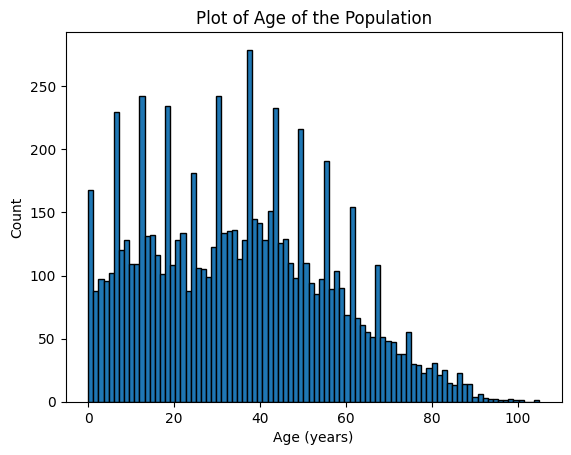

In [46]:
Age_Plot = plt.hist(ages_of_population, bins=num_bins, edgecolor='black')
plt.title('Plot of Age of the Population')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

- From the above plot, it could be observed that the higest age is between 35 years to 39 years, while the lowest population are people from age 90 years and above

In [47]:

cleaned2_census10_df['Age'].mode()

0    42
Name: Age, dtype: int64

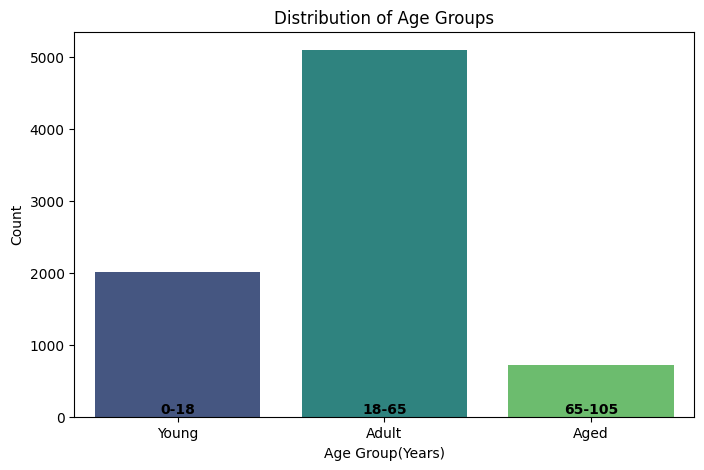

In [48]:
# Create age groups (e.g., young, adult, senior)
bins = [0, 18, 65, cleaned2_census10_df['Age'].max()]
labels = ['Young', 'Adult', 'Aged']
cleaned2_census10_df['AgeGroup'] = pd.cut(cleaned2_census10_df['Age'], bins=bins, labels=labels)

# Plot the distribution of age groups
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', data=cleaned2_census10_df, palette='viridis')

# Specify Age group years under each bin
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group(Years)')
plt.ylabel('Count')

# Add age range figures under each bin
for i, label in enumerate(labels):
    plt.text(i, -0.5, f'{bins[i]}-{bins[i+1]}', ha='center', va='bottom', fontweight='bold')

plt.show()

In [49]:
# Count breakdown of each component in the 'Age Group' column
age_group_counts = cleaned2_census10_df['AgeGroup'].value_counts()

# Display the count breakdown
print(age_group_counts)

Adult    5100
Young    2007
Aged      725
Name: AgeGroup, dtype: int64


In [50]:
# Statistical summary of age distribution
print(cleaned2_census10_df['Age'].describe())

# Hypothesis testing (e.g., comparing age distribution between different groups)
from scipy.stats import ttest_ind

young_age = cleaned2_census10_df[cleaned2_census10_df['AgeGroup'] == 'Young']['Age']
adult_age = cleaned2_census10_df[cleaned2_census10_df['AgeGroup'] == 'Adult']['Age']

t_stat, p_value = ttest_ind(young_age, adult_age)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

count    7910.000000
mean       35.409608
std        21.226112
min         0.000000
25%        18.000000
50%        35.000000
75%        51.000000
max       105.000000
Name: Age, dtype: float64
T-statistic: -104.95886967460731, p-value: 0.0


##### The next step is making a Histogram distribution plot of the 'Male'and 'Female'population accross the Age distributions

In [51]:
# Extracting for the Age column
age = cleaned2_census10_df['Age'] 

# Extracting for the gender column
gender = cleaned2_census10_df['Gender']  

# Extracting the data for each Gender acrcross Age distribution
ages_for_male = age[gender == 'Male'] # The ages for male
ages_for_female = age[gender == 'Female'] #The ages for female



# Determine bin width for both histograms (using the square root rule in this example)
num_bins_male = int(np.sqrt(len(ages_for_male)))
num_bins_female = int(np.sqrt(len(ages_for_female)))



In [52]:
num_bins_male

61

In [53]:
num_bins_female

64

In [54]:
max_ages_for_female=cleaned2_census10_df.loc[cleaned2_census10_df['Gender'] == 'Female', 'Age'].max()
min_ages_for_female=cleaned2_census10_df.loc[cleaned2_census10_df['Gender'] == 'Female', 'Age'].min()
print(f"The maximum age for female is: {max_ages_for_female}")
print(f"The minimum age for female is: {min_ages_for_female}")

The maximum age for female is: 101
The minimum age for female is: 0


In [55]:
max_ages_for_male=cleaned2_census10_df.loc[cleaned2_census10_df['Gender'] == 'Male', 'Age'].max()
min_ages_for_male=cleaned2_census10_df.loc[cleaned2_census10_df['Gender'] == 'Male', 'Age'].min()
print(f"The maximum age for male is: {max_ages_for_male}")
print(f"The minimum age for male is: {min_ages_for_male}")

The maximum age for male is: 105
The minimum age for male is: 0


In [56]:
# Calculate bin width
bin_width_male = round(((max_ages_for_male) - (min_ages_for_male)) / num_bins_male)
bin_width_female = round(((max_ages_for_female) - (min_ages_for_female)) / num_bins_female)


In [57]:
bin_width_male

2

In [58]:
bin_width_female

2

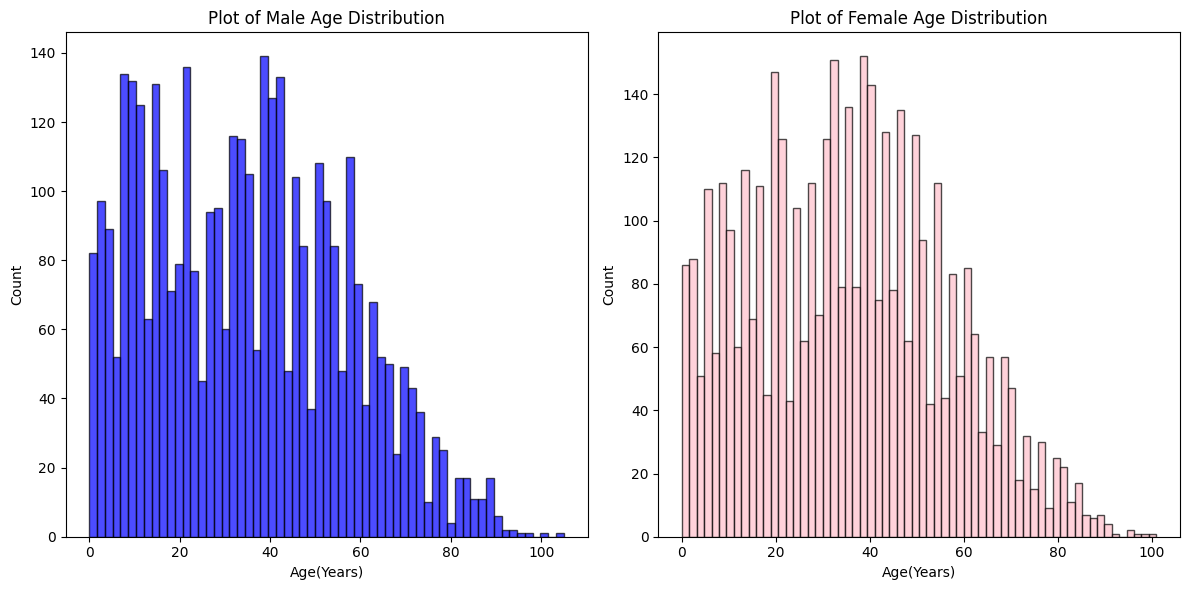

In [59]:
# From the calulations above, the bin width to be used is approx 2
# The number of bin for male is 61 and number of bin for female is 64

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
Plot_Male_Age = plt.hist(ages_for_male, bins=num_bins_male, edgecolor='black', color='blue', alpha=0.7)
plt.title('Plot of Male Age Distribution')
plt.xlabel('Age(Years)')
plt.ylabel('Count')


Plot_Female_Age = plt.subplot(1, 2, 2)
plt.hist(ages_for_female, bins=num_bins_female, edgecolor='black', color='pink', alpha=0.7)
plt.title('Plot of Female Age Distribution')
plt.xlabel('Age(Years)')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

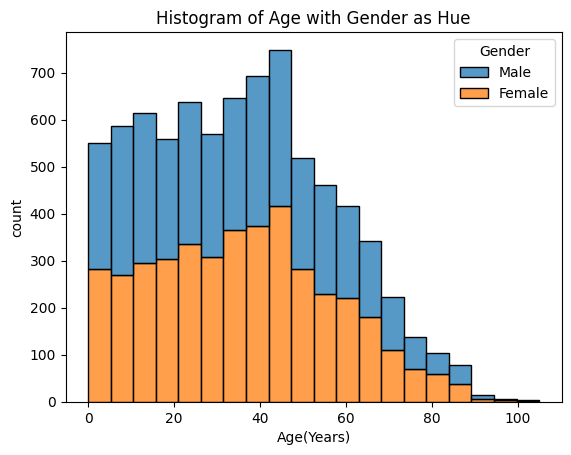

In [60]:
sns.histplot(data=cleaned2_census10_df, x='Age', hue='Gender', multiple='stack', bins=20)

# Add labels and title
plt.xlabel('Age(Years)')
plt.ylabel('count')
plt.title('Histogram of Age with Gender as Hue')

# Show the plot
plt.show()

##### Age Analysis by Pyramid

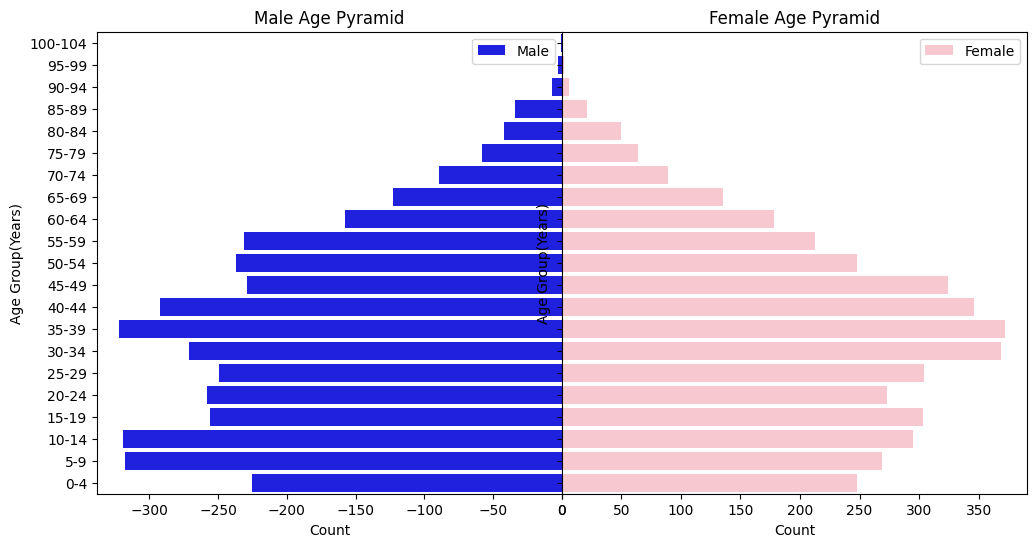

In [61]:
# Convert 'Age' column to integers
cleaned2_census10_df['Age'] = cleaned2_census10_df['Age'].astype(int)

# If you don't have 'Age_Group', create it based on 'Age'
max_age = cleaned2_census10_df['Age'].max()
bin_width = 5
bins = range(0, max_age + bin_width, bin_width)
labels = [f'{i}-{i+bin_width-1}' for i in range(0, max_age, bin_width)]

cleaned2_census10_df['Age_Group'] = pd.cut(cleaned2_census10_df['Age'], bins=bins, labels=labels)

# Create a count column for simplicity (using 'House Number' as a placeholder)
cleaned2_census10_df['Count'] = 1

# Separate data for Male and Female
male_data = cleaned2_census10_df[cleaned2_census10_df['Gender'] == 'Male']
female_data = cleaned2_census10_df[cleaned2_census10_df['Gender'] == 'Female']

# Group by Age_Group and sum the counts
male_data_grouped = male_data.groupby('Age_Group')['Count'].sum().reset_index()
female_data_grouped = female_data.groupby('Age_Group')['Count'].sum().reset_index()

# Multiply male counts by -1
male_data_grouped['Count'] *= -1

# Plotting the Age Pyramid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Male
sns.barplot(x='Count', y='Age_Group', data=male_data_grouped, color='blue', label='Male', ax=ax1)
ax1.set_title('Male Age Pyramid')
ax1.set_xlabel('Count')
ax1.set_ylabel('Age Group(Years)')
ax1.invert_yaxis()  # Invert entire plot vertically

# Plot for Female
sns.barplot(x='Count', y='Age_Group', data=female_data_grouped, color='pink', label='Female', ax=ax2)
ax2.set_title('Female Age Pyramid')
ax2.set_xlabel('Count')
ax2.set_ylabel('Age Group(Years)')
ax2.invert_yaxis()  # Invert entire plot vertically

# Manually add legends
ax1.legend()
ax2.legend()

# Remove the gap between the plots
plt.subplots_adjust(wspace=0)

# Display the plot
plt.show()


- The Age pyramid shows the age distribtions accross the Male and Fewmale population distinctively
- From the plot, Age 35 to 39 years have the highest number of population both for the Male and Female:
- The population of the Female within the Age of 35 to 39 years is above 350 and higher that of the Male counterpart of the same Age range is a little above than 300

##### Boxplot analysis of Marital Status accross Ages

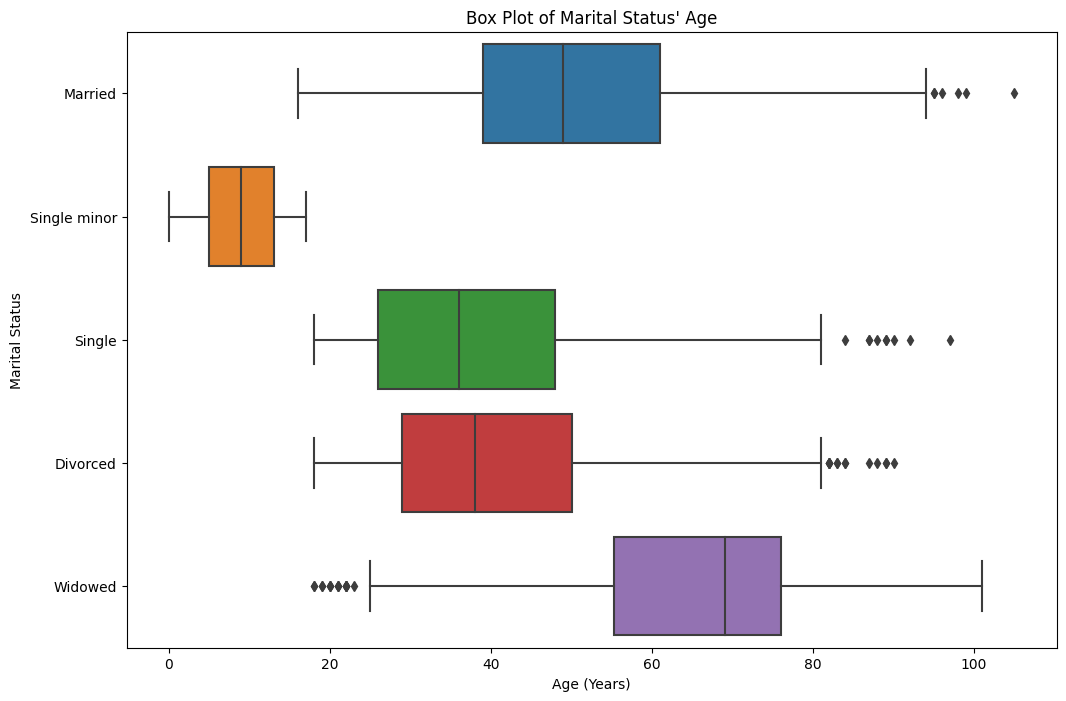

In [62]:



# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x=cleaned2_census10_df['Age'], y=cleaned2_census10_df['Marital Status'], orient='h')

# Add labels and title
plt.xlabel('Age (Years)')
plt.ylabel('Marital Status')
plt.title('Box Plot of Marital Status\' Age')

# Display the plot
plt.show()


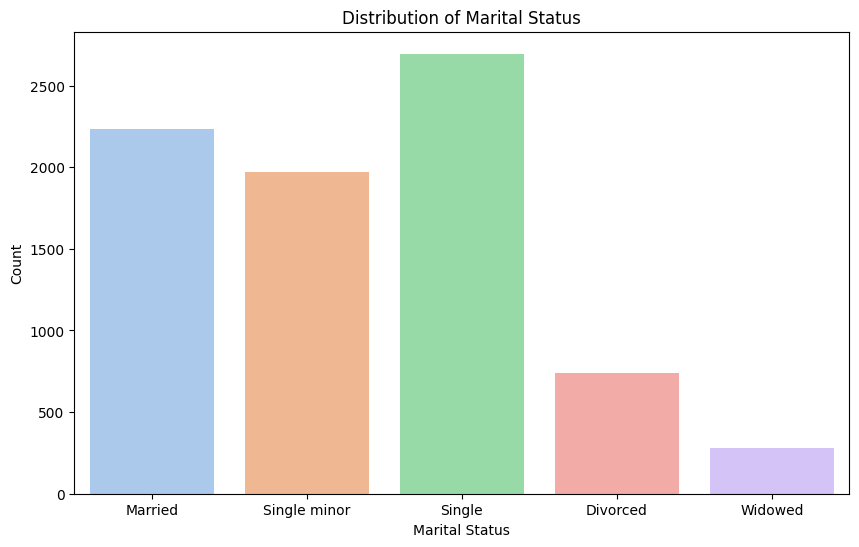

In [63]:
# Assuming your dataset has a column 'Marital Status'
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=cleaned2_census10_df, palette='pastel')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.show()

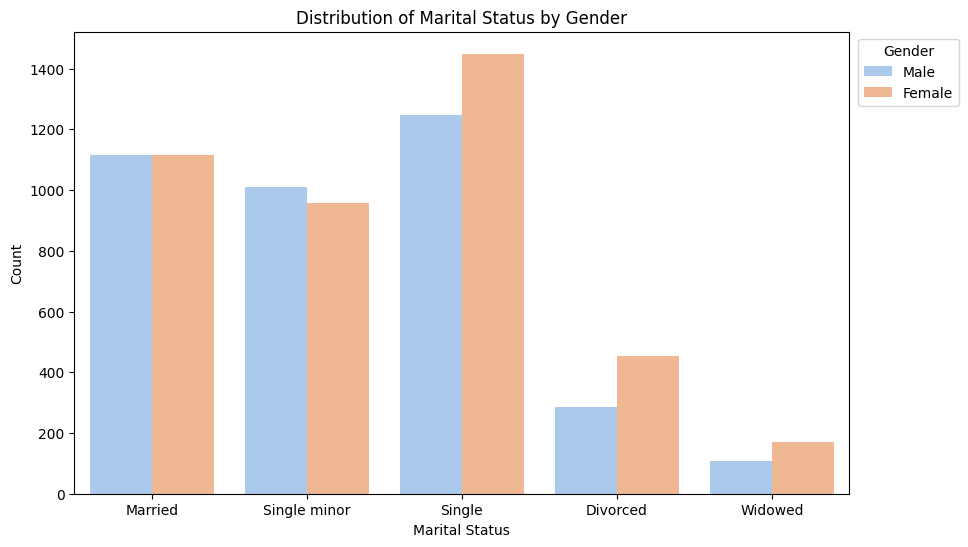

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', hue='Gender', data=cleaned2_census10_df, palette='pastel')
plt.title('Distribution of Marital Status by Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [65]:
# Count breakdown of each component in the 'Marital Status' column
marital_status_counts = cleaned2_census10_df['Marital Status'].value_counts()

# Display the count breakdown
print(marital_status_counts)

Single          2695
Married         2232
Single minor    1968
Divorced         737
Widowed          278
Name: Marital Status, dtype: int64


- Single has the majority 

###### Analysing for divorce count

In [66]:
# Filtering the file to include only individuals with Marital Status as Divorced
divorced_data = cleaned2_census10_df[cleaned2_census10_df['Marital Status'] == 'Divorced']

# Grouping the data by Gender and count 
divorced_gender_breakdown = divorced_data.groupby('Gender')['House Number'].count().reset_index()

# Rename the columns for clarity
divorced_gender_breakdown.columns = ['Gender', 'Count']

# Print the breakdown
print(divorced_gender_breakdown)


   Gender  Count
0  Female    452
1    Male    285


##### Examining  the number of university students and lecturers

In [67]:
# Count breakdown of each component in the 'Occupation' column
occupation_counts = cleaned2_census10_df['Occupation'].value_counts()

#  count breakdown
print(occupation_counts)

Student                                1617
Unemployed                              471
University Student                      454
Child                                   449
Retired Unemployed                       18
                                       ... 
Retired Lecturer, further education       1
Retired Politician's assistant            1
Retired Oncologist                        1
Retired Probation officer                 1
Retired Engineer, production              1
Name: Occupation, Length: 1038, dtype: int64


In [68]:
# Filter rows where the 'Occupation' column is either 'Higher education lecturer' or 'Lecturer, higher education'
filtered_cleaned2_census10_df = cleaned2_census10_df[cleaned2_census10_df['Occupation'].isin(['Higher education lecturer', 'Lecturer, higher education'])]

# Count the occurrences of each occupation
occupation1_counts = filtered_cleaned2_census10_df['Occupation'].value_counts()

# Print the counts
print(occupation1_counts)

Higher education lecturer     9
Lecturer, higher education    5
Name: Occupation, dtype: int64


##### Analyses of Religion accross various Ages

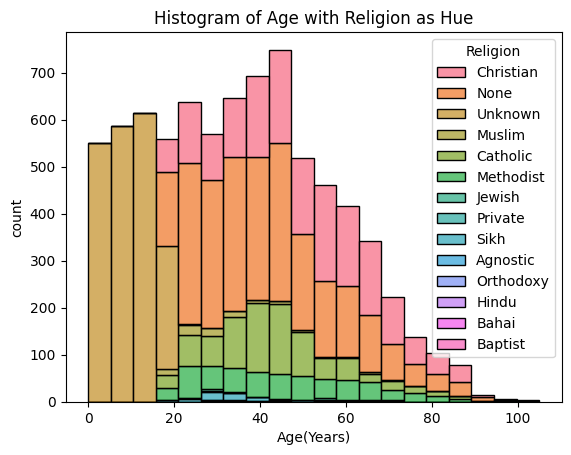

In [69]:
sns.histplot(data=cleaned2_census10_df, x='Age', hue='Religion', multiple='stack', bins=20)

# Add labels and title
plt.xlabel('Age(Years)')
plt.ylabel('count')
plt.title('Histogram of Age with Religion as Hue')

# Show the plot
plt.show()

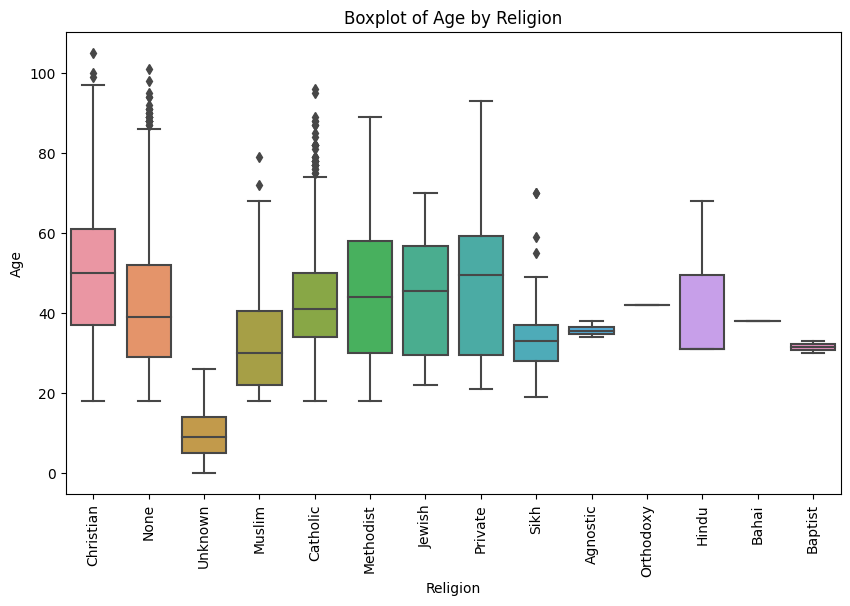

In [70]:
# Create a boxplot with vertical x-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Religion', y='Age', data=cleaned2_census10_df)
plt.title('Boxplot of Age by Religion')
plt.xlabel('Religion')
plt.ylabel('Age')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()


In [71]:
# Count breakdown of each component in the 'Religion' column
religion_counts = cleaned2_census10_df['Religion'].value_counts()

# Display the count breakdown
print(religion_counts)

None         2619
Unknown      2015
Christian    1738
Catholic      822
Methodist     525
Muslim         91
Sikh           57
Jewish         22
Private        10
Agnostic        4
Hindu           3
Baptist         2
Orthodoxy       1
Bahai           1
Name: Religion, dtype: int64


##### Analyses of Unemployment accross various Ages and Gender

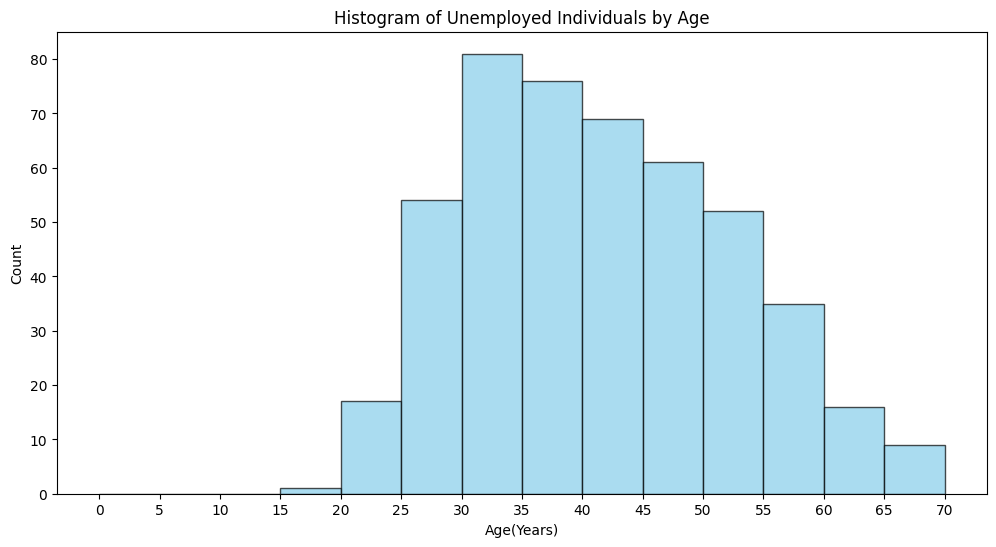

In [72]:
unemployed_data = cleaned2_census10_df[cleaned2_census10_df['Occupation'] == 'Unemployed']

# Define bin edges
bin_edges = [i for i in range(0, max(unemployed_data['Age']) + 5, 5)]

# Plotting the histogram with specified bins
plt.figure(figsize=(12, 6))
plt.hist(unemployed_data['Age'], bins=bin_edges, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Unemployed Individuals by Age')
plt.xlabel('Age(Years)')
plt.ylabel('Count')
plt.xticks(bin_edges)

plt.show()


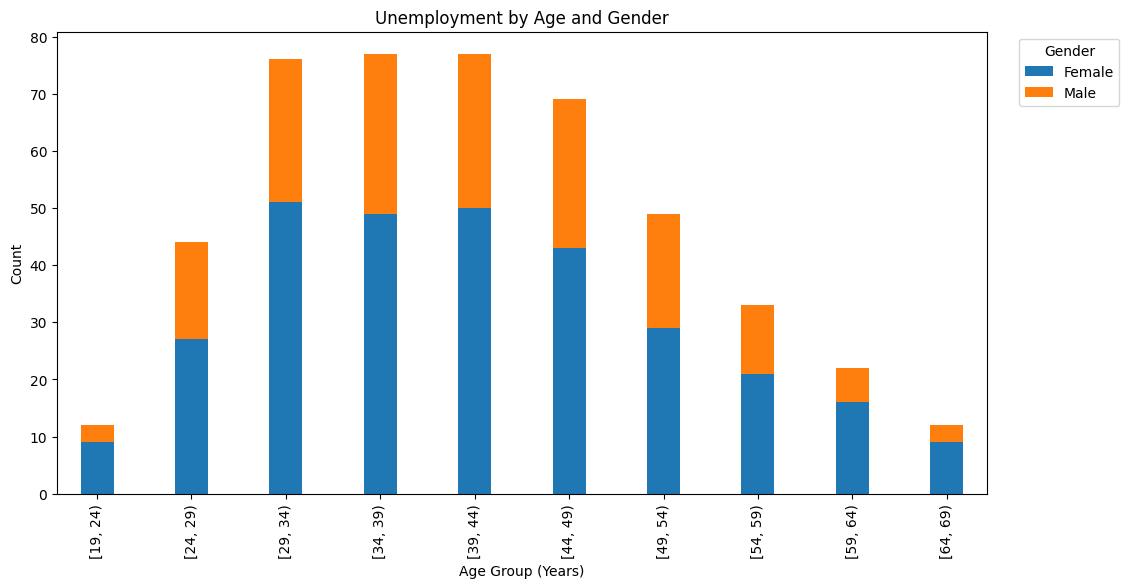

In [73]:
occupation_by_age_gender = cleaned2_census10_df.groupby(['Age', 'Gender', 'Occupation']).size().unstack(fill_value=0)

# Filter only unemployed individuals
unemployed_by_age_gender = occupation_by_age_gender[occupation_by_age_gender['Unemployed'] > 0]

# Select only the 'Unemployed' column
unemployed_by_age_gender = unemployed_by_age_gender[['Unemployed']]

# Reset index to make 'Age' and 'Gender' as regular columns
unemployed_by_age_gender.reset_index(inplace=True)

# Determine the minimum and maximum age in the dataset
min_age = unemployed_by_age_gender['Age'].min()
max_age = unemployed_by_age_gender['Age'].max()

# Create age bins with intervals of 5 within the available age range
age_bins = range(min_age, max_age + 5, 5)
unemployed_by_age_gender['AgeGroup'] = pd.cut(unemployed_by_age_gender['Age'], bins=age_bins, right=False)

# Pivot the DataFrame to have 'AgeGroup' and 'Gender' as columns
unemployed_by_age_gender_pivot = unemployed_by_age_gender.pivot_table(index='AgeGroup', columns='Gender', values='Unemployed', aggfunc='sum', fill_value=0)

# Plotting the histogram
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35

unemployed_by_age_gender_pivot.plot(kind='bar', stacked=True, width=width, ax=ax)

plt.title('Unemployment by Age and Gender')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()



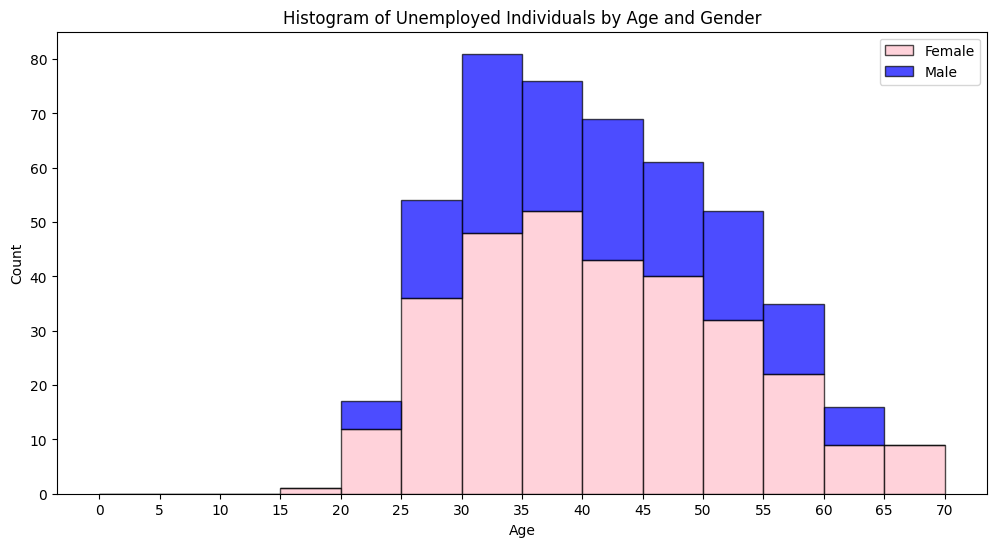

In [74]:
# Histogram plot
unemployed_data = cleaned2_census10_df[cleaned2_census10_df['Occupation'] == 'Unemployed']

# Define bin edges
bin_edges = [i for i in range(0, max(unemployed_data['Age']) + 5, 5)]

# Plotting the stacked histogram with specified bins, split by gender
plt.figure(figsize=(12, 6))
plt.hist([unemployed_data[unemployed_data['Gender'] == 'Female']['Age'],
          unemployed_data[unemployed_data['Gender'] == 'Male']['Age']],
         bins=bin_edges, color=['Pink', 'blue'], edgecolor='black', alpha=0.7, stacked=True, label=['Female', 'Male'])
plt.title('Histogram of Unemployed Individuals by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(bin_edges)
plt.legend()

plt.show()


##### Analyzing for Occupancy level

In [75]:
# Step 1: Sum the "Count" column to get the total population
total_population = cleaned2_census10_df['Count'].sum()

# Step 2: Determine the total number of houses
total_number_of_houses = cleaned2_census10_df.groupby(['House Number', 'Street']).size().reset_index(name='House Count').shape[0]

# Step 3: Calculate the occupancy level
occupancy_level = total_population / total_number_of_houses

# Print the result
print(f"Total Population: {total_population}")
print(f"Total Number of Houses: {total_number_of_houses}")
print(f"Occupancy Level (People per House): {occupancy_level:.2f}")

Total Population: 7910
Total Number of Houses: 2696
Occupancy Level (People per House): 2.93


In [76]:
occupancy_level = cleaned2_census10_df.groupby(['House Number','Street'])['First Name'].count().reset_index()
occupancy_level.columns = ['House Number','Street', 'Occupancy']
occupancy_level.head(7910)

,House Number,Street,Occupancy
0,1,Albion Street,4
1,1,Anderson Castle,4
2,1,Appletree Avenue,1
3,1,Arthur Cove,1
4,1,Bangor Burgs,2
...,...,...,...
2691,154,Honeysuckle Avenue,3
2692,155,Honeysuckle Avenue,4
2693,156,Honeysuckle Avenue,4
2694,157,Honeysuckle Avenue,3


In [77]:
average_occupancy = occupancy_level['Occupancy'].mean()
average_occupancy

2.9339762611275964

###### Estimating for Birthrate

In [78]:
#Estimating for birthrate, we consider the counts with rows with Age 0 years
age_0_counts = cleaned2_census10_df[cleaned2_census10_df['Age'] == 0].shape[0]

# Print or display the count of individuals with age 0
print(f"Count of individuals with age 0: {age_0_counts}")


Count of individuals with age 0: 78


In [79]:
# Get the total number of individuals in the dataset
total_population = cleaned2_census10_df.shape[0]

# Print or display the total population
print(f"Total Population: {total_population}")

Total Population: 7910


In [80]:
Birthrate = (age_0_counts/total_population)*1000

print(f"The Birthrate is: {Birthrate:.2f}")

The Birthrate is: 9.86


###### Estimating for Deathrate

In [81]:

import pandas as pd

def calculate_death_rates(cleaned2_census10_df):
    # Define age brackets (customize as needed)
    age_brackets = [(60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 104), (105, 109), (110, 114)]
 
    # Initialize a list to store results
    death_rates = []
 
    # Iterate over age brackets and compute death rates
    for i in range(len(age_brackets) - 1):
        start_age, end_age = age_brackets[i]
        next_age_bracket = age_brackets[i + 1]
 
        current_age_group = cleaned2_census10_df[(cleaned2_census10_df['Age'] >= start_age) & (cleaned2_census10_df['Age'] <= end_age)]
        next_age_group = cleaned2_census10_df[(cleaned2_census10_df['Age'] >= next_age_bracket[0]) & (cleaned2_census10_df['Age'] <= next_age_bracket[1])]
 
        # Assume the number of people in each generation was the same when they were the same age
        count_current_age_group = len(current_age_group)
        count_next_age_group = len(next_age_group)
 
        # Compute the differential over a 5-year period
        differential = count_current_age_group - count_next_age_group
 
        # Compute the death rate per annum (assuming a 5-year period)
        death_rate_per_annum = differential / 5
 
        # Store the result in the list
        age_comparison = f'{start_age}-{end_age} vs {next_age_bracket[0]}-{next_age_bracket[1]}'
        death_rates.append({'Age Comparison': age_comparison, 'Death Rate per Annum': death_rate_per_annum})
 
    # Create a DataFrame from the list
    result_cleaned2_census10_df = pd.DataFrame(death_rates)
 
    # Calculate the total sum of death rates per annum
    total_death_rate = result_cleaned2_census10_df['Death Rate per Annum'].sum()
    death_rates.append({'Age Comparison': 'Total', 'Death Rate per Annum': total_death_rate})
 
    # Create a DataFrame from the updated list
    result_cleaned2_census10_df = pd.DataFrame(death_rates)
 
    return result_cleaned2_census10_df

# Call the function with your DataFrame 'cleaned2_census10_df'
result_cleaned2_census10_df = calculate_death_rates(cleaned2_census10_df)
 
# Display the result
print(result_cleaned2_census10_df)

        Age Comparison  Death Rate per Annum
0       60-64 vs 65-69                  17.0
1       65-69 vs 70-74                  12.8
2       70-74 vs 75-79                  13.4
3       75-79 vs 80-84                   8.4
4       80-84 vs 85-89                   5.6
5       85-89 vs 90-94                   9.8
6       90-94 vs 95-99                   1.8
7     95-99 vs 100-104                   0.8
8   100-104 vs 105-109                   0.2
9   105-109 vs 110-114                   0.2
10               Total                  70.0


In [82]:
total_death_per_anum = 70

In [83]:
Population_death_rate = (total_death_per_anum/total_population)*1000
print(f"The Deathrate is: {Population_death_rate:.2f}")

The Deathrate is: 8.85


##### Analysing for infirmity

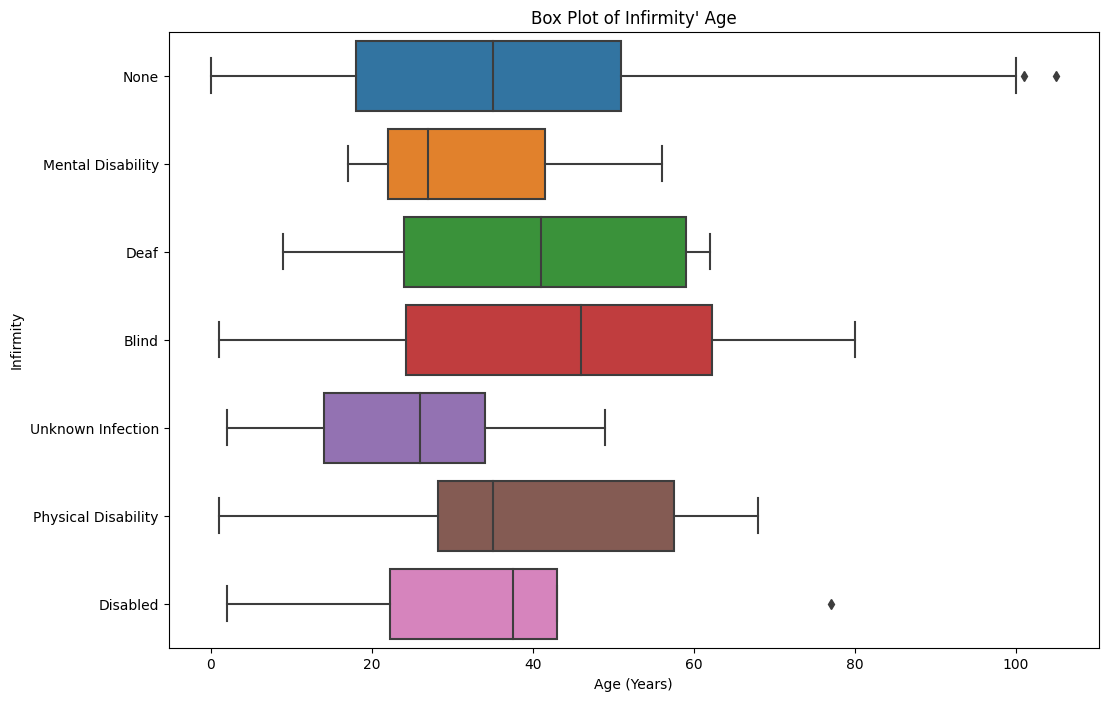

In [84]:
# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x=cleaned2_census10_df['Age'], y=cleaned2_census10_df['Infirmity'], orient='h')

# Add labels and title
plt.xlabel('Age (Years)')
plt.ylabel('Infirmity')
plt.title('Box Plot of Infirmity\' Age')

# Display the plot
plt.show()

In [85]:
# Count breakdown of each component in the 'Infirmity' column
infirmity_counts = cleaned2_census10_df['Infirmity'].value_counts()

# Display the count breakdown
print(infirmity_counts)

None                   7855
Physical Disability      22
Unknown Infection         9
Blind                     8
Disabled                  8
Deaf                      5
Mental Disability         3
Name: Infirmity, dtype: int64


###### Analysing for Emigration

In [86]:
# Count the occurrences of each unique entry in the 'Relationship to Head of House' column
relationship_counts = cleaned2_census10_df['Relationship to Head of House'].value_counts()

# Print the count of each unique entry
print("Count of each unique entry under 'Relationship to Head of House':")
print(relationship_counts)


Count of each unique entry under 'Relationship to Head of House':
Head                2693
Son                 1404
Daughter            1333
Husband              843
None                 459
Lodger               354
Wife                 271
Partner              241
Granddaughter         69
Grandson              62
Cousin                40
Sibling               38
Visitor               31
Step-Son              15
Nephew                14
Step-Daughter         14
Adopted Son           13
Adopted Daughter       9
Neice                  5
Daughter-in-law        2
Name: Relationship to Head of House, dtype: int64


##### Estimating for those Aged 65 years and above

In [87]:

# Count the occurrences of individuals aged 65 and above in the 'Age' column
age_65_and_above_count = cleaned2_census10_df[cleaned2_census10_df['Age'] >= 65].shape[0]

# Print the count of individuals aged 65 and above
print(f"Count of individuals aged 65 and above: {age_65_and_above_count}")


Count of individuals aged 65 and above: 780


##### Estimating for those Aged 20 years and below

In [88]:
# Count the occurrences of individuals aged 65 and above in the 'Age' column
age_20_and_below_count = cleaned2_census10_df[cleaned2_census10_df['Age'] <= 20].shape[0]

# Print the count of individuals aged 20 years and below
print(f"Count of individuals aged 20 and above: {age_20_and_below_count}")


Count of individuals aged 20 and above: 2311


##### Final outlook of the cleaned Data

In [89]:
cleaned2_census10_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Age_Group,Count
0,1,Upland Creek,Ross,Barton,26,Head,Married,Male,"Solicitor, Scotland",None,Christian,Adult,25-29,1
1,1,Upland Creek,Amelia,Barton,26,Wife,Married,Female,Lawyer,None,None,Adult,25-29,1
2,2,Upland Creek,Francesca,Smith,50,Head,Married,Female,Unemployed,None,None,Adult,45-49,1
3,2,Upland Creek,Connor,Smith,53,Husband,Married,Male,Unemployed,None,None,Adult,50-54,1
4,2,Upland Creek,Jacob,Smith,15,Adopted Son,Single minor,Male,Student,None,Unknown,Young,10-14,1


In [90]:
cleaned2_census10_df.tail()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Age_Group,Count
7905,1,Murphy Fortress,Sophie,Collier,7,Daughter,Single minor,Female,Student,None,Unknown,Young,5-9,1
7906,1,Murphy Fortress,Paul,Collier,7,Son,Single minor,Male,Student,None,Unknown,Young,5-9,1
7907,1,Murphy Fortress,Rhys,Collier,3,Son,Single minor,Male,Child,None,Unknown,Young,0-4,1
7908,1,Murphy Fortress,Jeffrey,Short,58,Visitor,Divorced,Male,"Engineer, automotive",None,None,Adult,55-59,1
7909,1,Murphy Fortress,Carl,Johnson,52,Lodger,Divorced,Male,Medical sales representative,None,Christian,Adult,50-54,1


##### Final outlook-cleaned Data

In [91]:
cleaned2_census10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7910 non-null   int64   
 1   Street                         7910 non-null   object  
 2   First Name                     7910 non-null   object  
 3   Surname                        7910 non-null   object  
 4   Age                            7910 non-null   int32   
 5   Relationship to Head of House  7910 non-null   object  
 6   Marital Status                 7910 non-null   object  
 7   Gender                         7910 non-null   object  
 8   Occupation                     7910 non-null   object  
 9   Infirmity                      7910 non-null   object  
 10  Religion                       7910 non-null   object  
 11  AgeGroup                       7832 non-null   category
 12  Age_Group                      783

###### Profile Report

In [92]:
import pandas as pd
from pandas_profiling import ProfileReport


C:\Program Files\Python311\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Program Files\Python311\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\746195\AppData\Local\Temp\ipykernel_12304\2381924783.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `impor

In [93]:
# Generate a profile report
profile = ProfileReport(cleaned2_census10_df, title='Pandas Profiling Report', explorative=True)

# Save the report as html file
profile.to_file("profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]